<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=300 height=300 align=center class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Hidden Markov Model  <br>
<font color=696880 size=4>
Parsa Sharifi

# Personal Data


In [1]:
# Set your student number and name
student_number = '400100616'
Name = 'Setayesh'
Last_Name = 'Esteki'

In [2]:
!pip install hmmlearn

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
# Define a function to plot the hidden states
def plot_hidden_states(model, X, lengths=None):
    hidden_states = model.predict(X, lengths)

    fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(10, 8))
    colors = plt.cm.get_cmap("viridis", model.n_components)

    for i, ax in enumerate(axs):
        mask = hidden_states == i
        ax.plot(X[mask], ".-", color=colors(i), ms=6, label=f"Hidden State {i}")
        ax.set_title(f"Hidden State {i}")
        ax.legend()

    plt.xlabel("Time Step")
    plt.show()


In [5]:
# Define the parameters of a more complex HMM with 4 hidden states and 4 possible observations

# Transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Initial probabilities for 4 states
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Generate a longer sequence of observations for more complexity
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])


In [6]:
# Viterbi Algorithm to determine the most probable state sequence

def viterbi(obs, A, B, pi):
    # Number of hidden states
    N = A.shape[0]
    # Length of the observation sequence
    T = len(obs)
    
    # Initialization step
    T1 = np.zeros((N, T))  # The probabilities of the most probable state sequence at each time step
    T2 = np.zeros((N, T), dtype=int)  # Backpointer for the most probable state sequence
    Z = np.zeros(T, dtype=int)  # The most probable state sequence (to be filled out)

    # Initialization
    T1[:, 0] = pi * B[:, obs[0]]
    
    # Recursion step
    for t in range(1, T):
        for i in range(N):
            trans_prob = T1[:, t-1] * A[:, i]  # Transition probabilities from the previous state to the current state
            max_trans_prob = np.max(trans_prob)
            T1[i, t] = max_trans_prob * B[i, obs[t]]  # Maximum probability with the emission probability
            T2[i, t] = np.argmax(trans_prob)  # Store the state that maximized the probability
    
    # Termination step
    Z[T-1] = np.argmax(T1[:, T-1])  # Final most probable state
    for t in range(T-2, -1, -1):
        Z[t] = T2[Z[t+1], t+1]  # Backtrack to find the most probable sequence of states

    return Z, T1, T2



In [9]:
import numpy as np

def viterbi(obs, A, B, pi):
    """
    Viterbi algorithm to find the most probable sequence of hidden states.

    Parameters:
    obs : list
        Sequence of observed states.
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    Z : list
        The most probable sequence of hidden states.
    T1 : 2D numpy array
        Probability of the most likely path so far.
    T2 : 2D numpy array
        Backpointer to keep track of the states.
    """
    # Number of hidden states (N) and number of time steps (T)
    N = A.shape[0]
    T = len(obs)

    # Initialize T1 and T2 matrices
    T1 = np.zeros((N, T))  # T1 stores the probabilities of the most likely path
    T2 = np.zeros((N, T), dtype=int)  # T2 stores the backpointers for reconstruction of the path

    # Initialization step: Calculate the probabilities for the first observation
    T1[:, 0] = pi * B[:, obs[0]]

    # Dynamic programming step: Iterate over the remaining observations
    for t in range(1, T):
        for i in range(N):
            # Calculate the transition probabilities to the current state
            trans_prob = T1[:, t-1] * A[:, i]
            max_trans_prob = np.max(trans_prob)
            T1[i, t] = max_trans_prob * B[i, obs[t]]  # Max transition probability * emission probability
            T2[i, t] = np.argmax(trans_prob)  # Store the state that maximized the transition probability

    # Termination step: Backtrack to find the most probable state sequence
    Z = np.zeros(T, dtype=int)
    Z[T-1] = np.argmax(T1[:, T-1])  # Start from the last state with highest probability

    # Backtrack to find the full sequence
    for t in range(T-2, -1, -1):
        Z[t] = T2[Z[t+1], t+1]  # Follow the backpointers

    return Z, T1, T2

# Example usage:
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Run the Viterbi algorithm
optimal_path, T1, T2 = viterbi(observations, A, B, pi)

# Print the optimal state sequence
print("Optimal state sequence:", optimal_path)


Optimal state sequence: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


In [10]:
# Run the Viterbi algorithm
optimal_path, T1, T2 = viterbi(observations, A, B, pi)
print("Optimal state sequence (from scratch):", optimal_path)


Optimal state sequence (from scratch): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


Use hmmlearn and check the results:

In [11]:
import numpy as np
from hmmlearn import hmm

# Define the observations (same as before)
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1]).reshape(-1, 1)

# Define transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Define emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Define initial state probabilities
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Using hmmlearn CategoricalHMM to check the results
try:
    # Initialize a Hidden Markov Model with 4 hidden states
    model = hmm.CategoricalHMM(n_components=4)

    # Set the model's initial state probabilities
    model.startprob_ = pi

    # Set the transition probability matrix for the model
    model.transmat_ = A

    # Set the emission probability matrix, which defines probabilities of observations given each state
    model.emissionprob_ = B

    # Use the Viterbi algorithm to decode the sequence and find the most likely state sequence
    state_sequence = model.predict(observations)

    # Print the resulting optimal state sequence determined by the model
    print("Optimal state sequence (using hmmlearn):", state_sequence)

    # Comparison of results with the custom Viterbi implementation
    assert np.array_equal(optimal_path, state_sequence), "Mismatch between custom implementation and hmmlearn!"
    print("Both implementations yield the same optimal state sequence.")

except AttributeError:
    print("CategoricalHMM is not available in this hmmlearn version. Consider downgrading hmmlearn or using another library like pomegranate.")


Optimal state sequence (using hmmlearn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]
Both implementations yield the same optimal state sequence.


Apply plot_hidden_states function and explain the results:

Optimal state sequence (using hmmlearn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


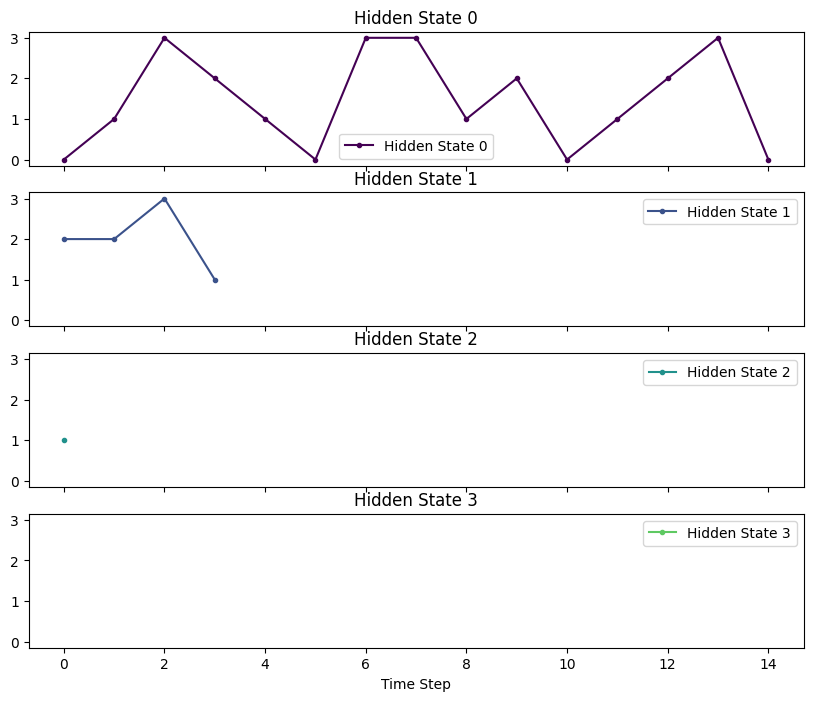

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Define the observations (same as before)
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1]).reshape(-1, 1)

# Define transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Define emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Define initial state probabilities
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Function to plot hidden states
def plot_hidden_states(model, X, lengths=None):
    hidden_states = model.predict(X)

    fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(10, 8))
    
    # Use the new approach to get the colormap
    cmap = plt.colormaps["viridis"]  # Updated line
    
    for i, ax in enumerate(axs):
        mask = hidden_states == i
        ax.plot(range(len(X[mask])), X[mask], ".-", color=cmap(i / model.n_components), ms=6, label=f"Hidden State {i}")
        ax.set_title(f"Hidden State {i}")
        ax.legend()

    plt.xlabel("Time Step")
    plt.show()

# Using hmmlearn CategoricalHMM to check the results
try:
    # Initialize a Hidden Markov Model with 4 hidden states
    model = hmm.CategoricalHMM(n_components=4)

    # Set the model's initial state probabilities
    model.startprob_ = pi

    # Set the transition probability matrix for the model
    model.transmat_ = A

    # Set the emission probability matrix, which defines probabilities of observations given each state
    model.emissionprob_ = B

    # Use the Viterbi algorithm to decode the sequence and find the most likely state sequence
    state_sequence = model.predict(observations)

    # Print the resulting optimal state sequence determined by the model
    print("Optimal state sequence (using hmmlearn):", state_sequence)

    # Plot the hidden states using the plot function
    plot_hidden_states(model, observations)

except AttributeError:
    print("CategoricalHMM is not available in this hmmlearn version. Consider downgrading hmmlearn or using another library like pomegranate.")


Now apply forward-backward algorithm:

In [16]:
import numpy as np

def forward_backward(obs, A, B, pi):
    """
    Forward-Backward algorithm for HMMs.

    Parameters:
    obs : list
        Sequence of observed states (encoded as integers).
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    gamma : 2D numpy array
        Posterior probabilities of states at each time step.
    alpha : 2D numpy array
        Forward probabilities.
    beta : 2D numpy array
        Backward probabilities.
    """
    N = A.shape[0]  # Number of states
    T = len(obs)    # Number of observations

    # Initialize alpha with the initial probabilities
    alpha = np.zeros((N, T))
    alpha[:, 0] = pi * B[:, obs[0]]  # Initial step based on the first observation
    
    # Step 1: Forward procedure
    for t in range(1, T):
        for j in range(N):
            alpha[j, t] = np.sum(alpha[:, t-1] * A[:, j]) * B[j, obs[t]]

    # Step 2: Backward procedure
    beta = np.zeros((N, T))
    beta[:, T-1] = 1  # Initialize beta with 1 at the last observation

    for t in range(T-2, -1, -1):
        for i in range(N):
            beta[i, t] = np.sum(A[i, :] * B[:, obs[t+1]] * beta[:, t+1])

    # Step 3: Calculate the posterior probabilities (gamma)
    gamma = (alpha * beta) / np.sum(alpha * beta, axis=0)
    
    return gamma, alpha, beta

# Example usage:
# Define the parameters (same as before)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

pi = np.array([0.4, 0.3, 0.2, 0.1])

# Define a sequence of observations (encoded as integers)
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])




In [17]:
gamma, alpha, beta = forward_backward(observations, A, B, pi)
print("Posterior probabilities (gamma):", gamma)

Posterior probabilities (gamma): [[0.6146384  0.2848885  0.12835068 0.19955361 0.28907633 0.4095703
  0.14934406 0.10727323 0.17449579 0.2549887  0.48195597 0.27425174
  0.22183932 0.19962298 0.41576692 0.23393826 0.18015695 0.18966306
  0.13228975 0.18590041]
 [0.11813748 0.2232025  0.29284317 0.48576923 0.3255039  0.13374932
  0.20577366 0.27536529 0.37242092 0.44231516 0.15747749 0.28523268
  0.44327498 0.27145712 0.14723399 0.31266142 0.52991664 0.52592256
  0.343536   0.35434612]
 [0.1725203  0.43644251 0.37232498 0.11682914 0.31845804 0.27250425
  0.42082444 0.40141187 0.3786388  0.09911533 0.20470527 0.37797665
  0.13113364 0.29125424 0.25100225 0.3899755  0.11076301 0.1066552
  0.34424573 0.39476224]
 [0.09470382 0.05546649 0.20648117 0.19784803 0.06696172 0.18417613
  0.22405784 0.21594961 0.07444448 0.20358081 0.15586127 0.06253893
  0.20375206 0.23766565 0.18599684 0.06342482 0.1791634  0.17775918
  0.17992852 0.06499124]]
